In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("high_diamond_ranked_10min.csv")

In [3]:
cols = ["blueWins","blueDragons","redDragons"]
data = df[cols]

In [4]:
data

,blueWins,blueDragons,redDragons
0,0,0,0
1,0,0,1
2,0,1,0
3,0,0,0
4,0,0,1
...,...,...,...
9874,1,1,0
9875,1,1,0
9876,0,0,1
9877,0,1,0


In [5]:
data.dtypes

blueWins       int64
blueDragons    int64
redDragons     int64
dtype: object

In [6]:
data["blueDragons"].unique()

array([0, 1], dtype=int64)

In [7]:
data["redDragons"].unique()

array([0, 1], dtype=int64)

In [8]:
bluewin = data[data["blueWins"] == 1]
redwin  = data[data["blueWins"] == 0]

In [9]:
dragon_win = data[((data["blueWins"] == 1) & (data["blueDragons"] == 1)) | \
                  ((data["blueWins"] == 0) & (data["redDragons"] == 1))]

In [10]:
dragon_win

,blueWins,blueDragons,redDragons
1,0,0,1
4,0,0,1
5,1,1,0
6,1,1,0
7,0,0,1
...,...,...,...
9866,1,1,0
9867,0,0,1
9874,1,1,0
9875,1,1,0


In [11]:
dragon_lost = data[((data["blueWins"] == 1) & (data["redDragons"] == 1)) | \
                  ((data["blueWins"] == 0) & (data["blueDragons"] == 1))]

In [12]:
dragon_lost

,blueWins,blueDragons,redDragons
2,0,1,0
16,1,0,1
18,1,0,1
23,0,1,0
28,0,1,0
...,...,...,...
9870,1,0,1
9871,0,1,0
9872,1,0,1
9877,0,1,0


In [13]:
total = len(dragon_lost) + len(dragon_win)

In [14]:
labels = ["Got First Dragon In 10min and Won","Got First Dragon In 10min and Lost"]
sizes = [len(dragon_win)/total, len(dragon_lost)/total]
explode = (0.1, 0.1)

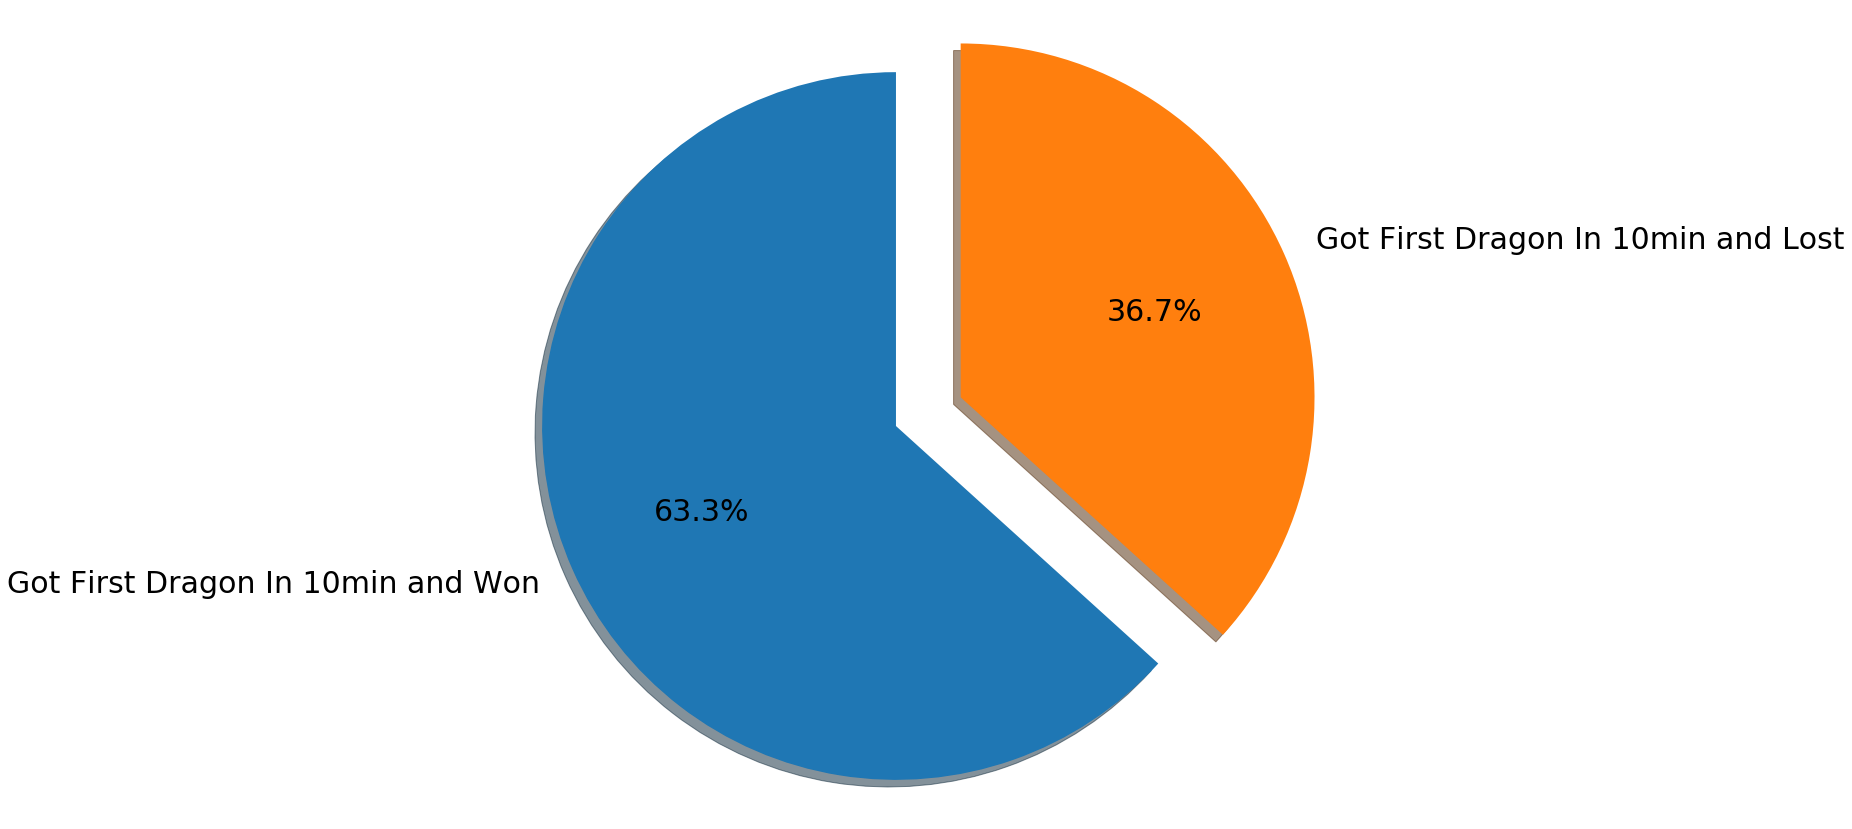

In [15]:
fig, ax = plt.subplots(figsize=(15,15))
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90, textprops={'fontsize': 30})
ax.axis('equal')  
plt.show()